<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Olivia!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1.  I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.
    
    
please see an example
    
    For this project, you’ll work with data from Instacart.

    Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

    Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

<div class="alert alert-info"> <b>Student сomments:

    
Let me know if this is how you want me to make comments and answers

<div class="alert alert-info"> <b>Student answer..</div>

In this analysis of Instacart data I will aim to do the following:

1. Clean the data

2. Identify trends and insights which could better help the company understand their customers' shopping habits and most popular products

3. Provide visualized feedback for reference

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Well done!

# Instacart Market Basket Analysis

## Importing the required libraries

In [1]:
# Import the libraries you'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

## Analyze your data

In the cells below, display the datasets using `.info()` and `.head()` to gain insights into their structure and content.

- `.info()`: Provides a concise summary of the dataset, including the data types, non-null counts, and memory usage.
- `.head()`: Displays the first few rows of the dataset, offering a quick overview of the data values.

In [3]:
# In this cell, type "orders" below this line and execute the cell

orders.info() #display dtypes, Nans/non-null, and content

orders.head(10) #display formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


Orders summary:

* 478,967 rows × 6 columns.

Content:
* Tracks each user's orders — when and how they placed them.
* Columns include: order ID, user ID, day of week (DOW), hour of day, and how many days since their previous order.

Data Types:
* Mostly int64, except for days_since_prior_order which is a float64 because it contains missing values.

Missing Data:
* days_since_prior_order has missing values (about 28,819 missing).
* first-time orders likely don't have a "prior" order to calculate from.

Insight:
* Order patterns can be studied across different days and times
* Users have multiple orders

In [4]:
# In this cell, type "products" below this line and execute the cell
products.info(show_counts=True) #display dtypes, Nans/non-null, and content


products.head(10) #display formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


Products Summary:

* 49,694 rows × 4 columns.

Content:
* Lists all the products being sold.
* Includes product ID, product name, aisle ID and department ID.

Data Types:
* int64 for IDs 
* object for product names

Missing Data:
* product_name is missing for some products (1,258 missing entries)

Insights:
* Product names vary in length and type (some provide brand name, some don't. Use of special characters like "-" and "'").
* Each product uniquely identifies a grocery aisle and grocery department

Repeat this process for each dataset to understand the structure, including the types of columns and rows they contain. Add additional code cells as needed for your analysis.

In [5]:
aisles.info() #display dtypes, Nans/non-null, and content

aisles.head() #display formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Aisles Summary:
* 134 rows × 2 columns.

Content:
* Small table that links each aisle_id to its aisle name.

Data Types:
* int64 for ID 
* object for name

Missing Data:
* No missing data — all aisles and IDs are present

Insights:
* Aisles have diverse names — prepared foods, cheeses, granola bars, etc.
* Useful for grouping products into broader shopping categories like dairy or snack_foods

In [6]:
departments.info() #display dtypes, Nans/non-null, and content

departments.head() #display formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Depts Summary:
* 21 rows × 2 columns.

Content:
* Small lookup table: maps each department_id to a department name.

Data Types:
* int64 for ID
* object for department name

Missing Data:
* None — all department IDs and names are complete.

Insights:
* Departments are more general categories that aisles (frozen, bakery, produce, etc.).

In [7]:
order_products.info() #display dtypes, Nans/non-null, and content

order_products.head() #display formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


Order_Products Summary:
* 4,545,007 rows × 4 columns (very large).

Content:

* Connects specific products to specific orders - organized as numbers rather than names (each row = 1 item placed in a single order)
* order_id: unique identifier for each order
* product_id: ID num that uniquely identifies each product
* add_to_cart_order_ Tells what products were bought, order they were added to cart, and whether they were reordered.

Data Types:

* int64 for most
* add_to_cart_order is a float64 — expect to be integers, could indicate Nans

Missing Data:

* Seems to be no missing data, but float could indicate null values

Insights:

* Captures shopping behavior (e.g., first items added, reorders).
* Good for understanding customer habits

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__


Great. First look at the data is done

## Find and Remove Missing Values

We noticed that some columns contain missing values.

Here are some useful code snippets:

```python
# Identify missing values in each column
print(dataset.isnull().sum())

# Display rows where a specific column has missing values
print(dataset[dataset['column_name'].isna()])

# Confirm no missing values remain
print(dataset.isnull().sum())
```

### `products` Data Frame

We will begin by addressing the missing values in the `products` data frame.

In [8]:
# Display rows where the product_name column has missing values
print(products.isnull().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


It seems suspicious that all rows with missing `product_name` might be associated with `aisle_id` 100 and `department_id` 21. Let’s verify this by checking if any rows with missing `product_name` have an `aisle_id` different from 100 and 21. This will help us confirm if the issue is isolated to this aisle or spread across others.

In [9]:
products[products['product_name'].isnull()]['department_id'].value_counts()

21    1258
Name: department_id, dtype: int64

In [10]:
# Combine conditions to check for missing product names in aisles other than 100
missing_pns = products[(products['product_name'].isna()) & (products['aisle_id']!=100)]
missing_pns #print rows with missing product_name and aisle_id is not 100

,product_id,product_name,aisle_id,department_id


In [11]:
# Combine conditions to check for missing product names in departments other than 21
products[(products['product_name'].isna())&(products['department_id']!=21)]

,product_id,product_name,aisle_id,department_id


To better understand the missing product_name values, let’s determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [12]:
# What is this aisle and department?
print(aisles[aisles['aisle_id']==100]['aisle'])
print(departments[departments['department_id']==21]['department'])

99    missing
Name: aisle, dtype: object
20    missing
Name: department, dtype: object


In [13]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna("Unknown")

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You chose the most correct way to replace the omissions in the categorical column. Well done!)

### `orders` data frame

Now let's fill in missing values from the `orders` table.

In [14]:
# Display rows where the days_since_prior_order column has missing values
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [15]:
# Are there any missing values where it's not a customer's first order?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number']>1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

Now let's fill in missing values from the order_products table.

In [16]:
# Display rows where the add_to_cart_order column has missing values
order_products[order_products['add_to_cart_order'].isnull()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [17]:
# Use .min() and .max() to find the minimum and maximum values for this column.

print(order_products['add_to_cart_order'].min()) 
print(order_products['add_to_cart_order'].max())

1.0
64.0


In [18]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_order_ids = order_products.loc[order_products['add_to_cart_order'].isnull(), 'order_id'].unique()
missing_order_ids

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [19]:
# Do all orders with missing values have more than 64 products?
missing_orders = order_products[order_products['order_id'].isin(missing_order_ids)]
order_counts = missing_orders.groupby('order_id').size()
orders_over_64 = (order_counts > 64).all()
orders_over_64

True

In [20]:
# Replace missing values with 999 and convert column to integer type
#order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)

# changed replacement method to ensure that later analysis won't be effected
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('Int64', errors='ignore') 
order_products['add_to_cart_order']

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: Int64

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Replacing it with 999/-1 etc is not really good. Tip for the future, look, it's not good to try to fill in the blanks left and right. In real work - replace with zero now, then forget and average count a month later. Plus there may be times when a bonus purchase or gift, will cost zero. In general, if it is possible to leave skips as skips - and here it can be done, it is better to do so, the results, even if we want to calculate something - it will not affect the results

It is better to use this code construction:
    
    data[''] = data[''].astype('Int64', errors='ignore')
</div>

<div class="alert alert-info"> <b>Student сomments:

I'm glad you mentioned this, as I was wondering the same thing. I was worried that if I changed it to 0, it would look like I didn't follow the course directions. I've updated above

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Great!

For some reason, any item placed in the cart 65th or later has a missing value in the `'add_to_cart_order'` column. Maybe the data type of that column in the database could only hold integer values from 1 to 64. We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. We also converted the column to integer data type. We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

## Find and Remove Duplicate Values from All the Datasets

Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of our analysis. To handle this:

1. Use the `.duplicated()` method to identify duplicate rows. This method returns a Boolean series where `True` indicates a duplicate row.
2. Apply the `.drop_duplicates()` method to remove these duplicate rows, ensuring a cleaner dataset.
3. Optionally, you can set the `keep` parameter in `.drop_duplicates()` to specify which duplicate to retain (`'first'` or `'last'`).

Here is some example code for reference:
```python
# Check for duplicates
print(dataset.duplicated().sum())  # Number of duplicate rows

# View duplicate rows
print(dataset[dataset.duplicated()]

# Remove duplicates
dataset = dataset.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(dataset.duplicated().sum())  # Should return 0
```

Repeat this process for all datasets to ensure they are free of duplicate rows.

### `orders` data frame

In [21]:
# Find the number of duplicate rows in the orders dataframe
orders.duplicated().sum()

15

In [22]:
# View the duplicate rows
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [23]:
# Remove duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)

In [24]:
# Double check for duplicate rows
print(orders.duplicated().sum())

0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Duplicate checking is the basis of data preprocessing

### `products` data frame

In [25]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [26]:
# Check for just duplicate product IDs using subset='product_id' in duplicated()
products['product_id'].duplicated().sum()

0

Hint: To identify duplicate product names more effectively, convert the names to lowercase for consistent comparison. Use the .str.lower() method on the product_name column to standardize the text before checking for duplicates.

In [27]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
products['product_name'].duplicated().sum()

1361

Let's see what that looks like in our dataset :

In [28]:
products[products['product_name'].str.lower() == 'high performance energy drink']

,product_id,product_name,aisle_id,department_id
22540,22541,high performance energy drink,64,7
49689,49690,high performance energy drink,64,7


In [29]:
# Drop duplicate product names (case insensitive)
products['product_name'] = products['product_name'].drop_duplicates()

### `departments` data frame

In [30]:
# Check for duplicate entries in the departments dataframe
departments.duplicated().sum()

0

### `aisles` data frame

In [31]:
# Check for aisles entries in the aisles dataframe
aisles.duplicated().sum()

0

### `order_products` data frame

In [32]:
# Check for duplicate entries in the order_products dataframe
order_products.duplicated().sum()

0

We have now successfully cleaned our data. Let's begin our exploratory data analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

To verify that the values in the `order_hour_of_day` and `order_dow` columns are sensible:

1. **Check unique values**: Use `.unique()` on each column to extract all distinct values present.
2. **Sort the results**: Use `sorted()` to arrange the unique values in ascending order for easier verification.
3. **Validate ranges**:
   - Ensure `order_hour_of_day` values range from 0 to 23 (representing hours of the day).
   - Ensure `order_dow` values range from 0 to 6 (representing days of the week).

This process confirms that the data aligns with expected ranges and there are no out-of-bound or invalid entries.

In [33]:
orders['order_hour_of_day'].unique()
print(sorted(orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [34]:
orders['order_dow'].unique()
print(sorted(orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


### [A2] What time of day do people shop for groceries?

To determine the time of day people shop for groceries, analyze the order_hour_of_day column in the orders dataset. Use .value_counts() to count the number of orders placed at each hour, and then sort the results by the hour for a clear chronological order.

Finally, visualize the data with a bar plot to easily observe the shopping trends across different times of the day.

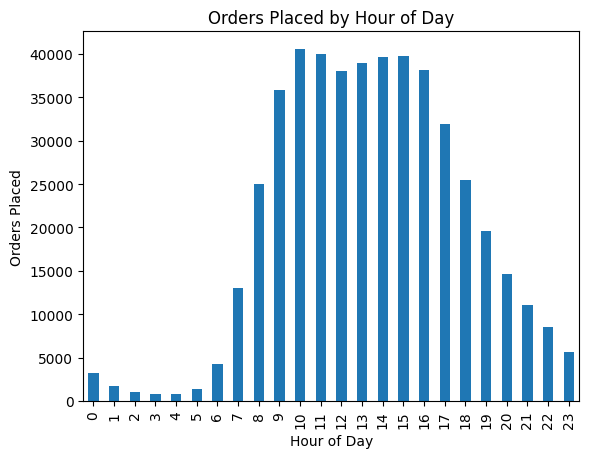

In [35]:
orders['order_hour_of_day'].value_counts().sort_index()
order_per_hour = orders['order_hour_of_day'].value_counts().sort_index()
order_per_hour.plot(kind='bar')
plt.xlabel('Hour of Day')     
plt.ylabel('Orders Placed') 
plt.title('Orders Placed by Hour of Day')
plt.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great

### [A3] What day of the week do people shop for groceries?

To figure out what day of the week people shop for groceries, analyze the order_dow column in the orders dataset. Use .value_counts() to count the number of orders for each day of the week, and then sort the results by the day index to maintain the correct order.

Visualize the data with a bar plot to clearly observe shopping patterns across the days of the week.

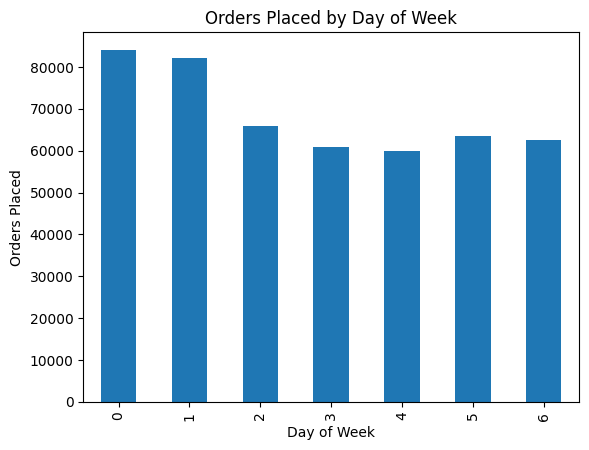

In [36]:
orders['order_dow'].value_counts().sort_index()
orders_by_day = orders['order_dow'].value_counts().sort_index()
orders_by_day.plot(kind='bar')
plt.xlabel('Day of Week')     
plt.ylabel('Orders Placed') 
plt.title('Orders Placed by Day of Week')
plt.show()

The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You're right to sign the charts

### [A4] How long do people wait until placing another order?

To understand how long people wait before placing another order, analyze the days_since_prior_order column in the orders dataset. Use .value_counts() to count how many orders were placed for each interval of days, then sort the results by the number of days for clarity.

Visualize the data using a bar plot to observe patterns in ordering frequency over time.

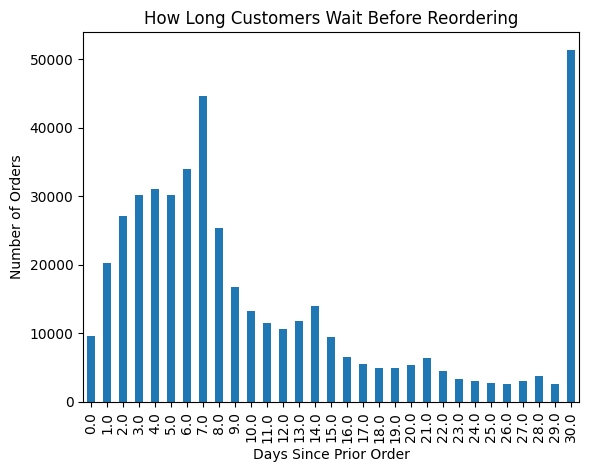

In [37]:
days_waited = orders['days_since_prior_order'].value_counts()
days_waited = days_waited.sort_index()
days_waited.plot(kind='bar')


plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('How Long Customers Wait Before Reordering')
plt.show()

The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

The 0 values probably correspond to customers who placed more than one order on the same day.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

To determine if there’s a difference in the `order_hour_of_day` distributions on Wednesdays and Saturdays, follow these steps:

1. **Create masks** for Wednesday (`order_dow == 3`) and Saturday (`order_dow == 6`) to filter the orders data.
2. **Count the order hours** for each day using `.value_counts()` and sort them by hour with `.sort_index()` for clarity.
3. **Combine the counts** for both days into a single DataFrame using `pd.concat()`, and label the columns for easier interpretation.

After preparing the data, plot histograms for both days to visually compare the distribution of order times. Look for patterns such as peaks or differences in the busiest times.

In [38]:
weds_orders = orders[orders['order_dow'] == 3]
sat_orders = orders[orders['order_dow'] == 6]

In [39]:
weds_counts = weds_orders['order_hour_of_day'].value_counts().sort_index()
sat_counts = sat_orders['order_hour_of_day'].value_counts().sort_index()

In [40]:
order_hours_comparison = pd.concat(
    [weds_counts, sat_counts], 
    axis=1,
    keys=['Wednesday', 'Saturday']
)

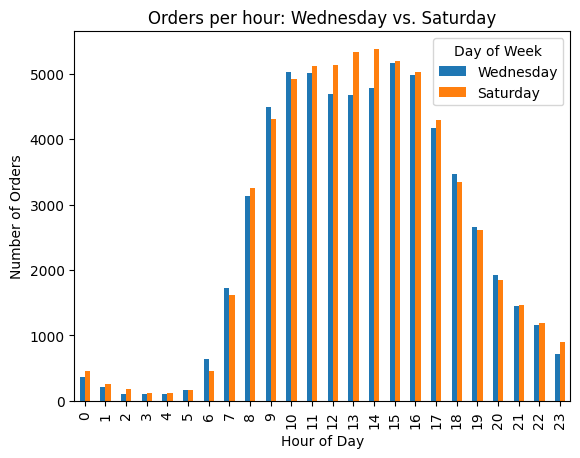

In [41]:
order_hours_comparison.plot(kind = 'bar', legend = True)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Orders per hour: Wednesday vs. Saturday')
plt.legend(title='Day of Week')
plt.show()

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somewhere between 11h and 13h.

### [B2] What's the distribution for the number of orders per customer?

To explore the distribution of the number of orders per customer:

1. **Group the data** by `user_id` to calculate the total number of orders for each customer. Use `.groupby('user_id')` and count the `order_id` for each group.
2. **Sort the results** using `.sort_values()` for better readability.
3. **Visualize the distribution** using a histogram to observe how many orders most customers typically place.

Adjust the number of bins in the histogram to refine the visualization and better capture the pattern.

In [42]:
orders.groupby('user_id')['order_id'].count().sort_values()

user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64

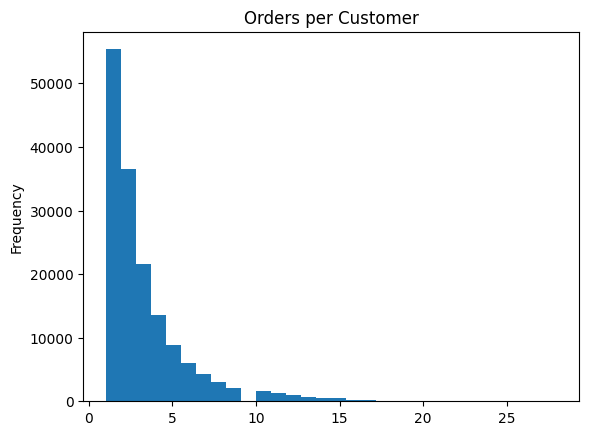

In [43]:
orders.groupby('user_id')['order_id'].count().plot(kind='hist', bins=30, title='Orders per Customer')
plt.show()


Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

### [B3] What are the top 20 popular products (display their id and name)?

To identify the top 20 most popular products:

1. **Merge the datasets**: Combine `order_products` and `products` on `product_id` to access both the product IDs and names in a single DataFrame.
2. **Group the data**: Group by both `product_id` and `product_name` to aggregate the order counts for each product using `.size()`.
3. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their popularity.
4. **Display the top 20**: Use `.head(20)` to focus on the most frequently ordered products.
5. **Visualize the results**: Create a bar chart to highlight the top products and their order counts.

This will give you a clear view of the most popular products and their ranking.


In [44]:
merged_prods = order_products.merge(products, on='product_id', how='inner')

In [45]:
top_products = merged_prods.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)

In [46]:
top_products

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64

The top 20 items are all produce, except for the milk. Looks like people want delicious and nutritious!

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?
To analyze how many items people typically buy in one order:

1. **Group the data** by `order_id` and count the number of products (`product_id`) in each order using `.count()`. This gives the number of items in each order.
2. **Aggregate the counts**: Use `.value_counts()` to determine how frequently different order sizes occur, and then sort the results with `.sort_index()` to organize by the number of items.
3. **Visualize the distribution**: Use a bar plot to show the frequency of orders for each size, with the x-axis representing the number of items and the y-axis representing the number of orders.

This will help you understand the typical size of a grocery order and identify any trends in purchasing behavior.

In [47]:
order_products.groupby('order_id')['product_id'].count().value_counts().sort_index()

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64

Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a cutoff and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

In [48]:
(order_products.groupby('order_id')['product_id'].count().value_counts().sort_index().loc[1:35])

1     21847
2     26292
3     29046
4     31054
5     31923
6     31698
7     30822
8     28539
9     25742
10    23248
11    20406
12    18539
13    16497
14    14472
15    12696
16    11465
17    10002
18     8726
19     7612
20     6771
21     5738
22     5096
23     4422
24     3838
25     3382
26     2812
27     2458
28     2137
29     1899
30     1618
31     1328
32     1171
33     1003
34      845
35      686
Name: product_id, dtype: int64

<AxesSubplot:title={'center':'Typical Order Size'}, xlabel='Number of Items', ylabel='Number of Orders'>

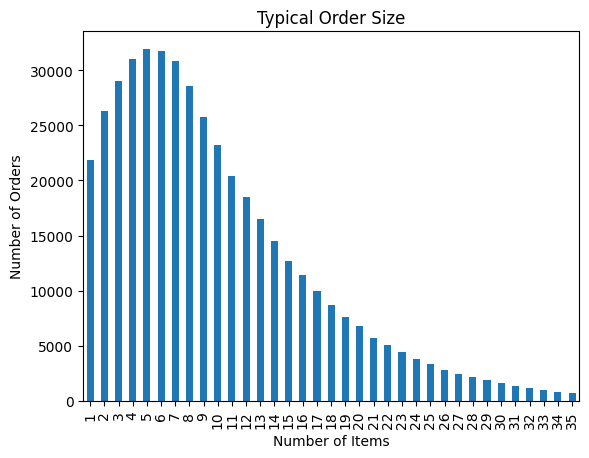

In [49]:
order_size_dist = order_products.groupby('order_id')['product_id'].count().value_counts().sort_index().loc[1:35]
order_size_dist.plot(kind='bar', 
                     xlabel='Number of Items', 
                     ylabel='Number of Orders', 
                     title='Typical Order Size')

The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

To find the top 20 most frequently reordered items:

1. **Filter the data**: Use `order_products['reordered'] == 1` to isolate only the products that have been reordered.
2. **Merge the datasets**: Combine the filtered `order_products` with the `products` dataset on `product_id` to get both the product names and IDs.
3. **Group the data**: Group by both `product_id` and `product_name` to calculate how many times each product was reordered, using `.size()`.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank the products by reorder frequency.
5. **Display the top 20**: Use `.head(20)` to focus on the most frequently reordered products.
6. **Visualize the data**: Create a bar chart to showcase the top reordered items and their frequencies.

This process highlights the products that customers consistently return to and reorder.

In [50]:
reordered_products = order_products[order_products['reordered'] == 1]

In [51]:
merged_prod_orders = reordered_products.merge(products, on='product_id', how='inner')

In [52]:
reorder_freq = merged_prod_orders.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)
reorder_freq

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
dtype: int64

<AxesSubplot:title={'center':'Top 20 Reordered Items'}, xlabel='Product Name', ylabel='Frequency'>

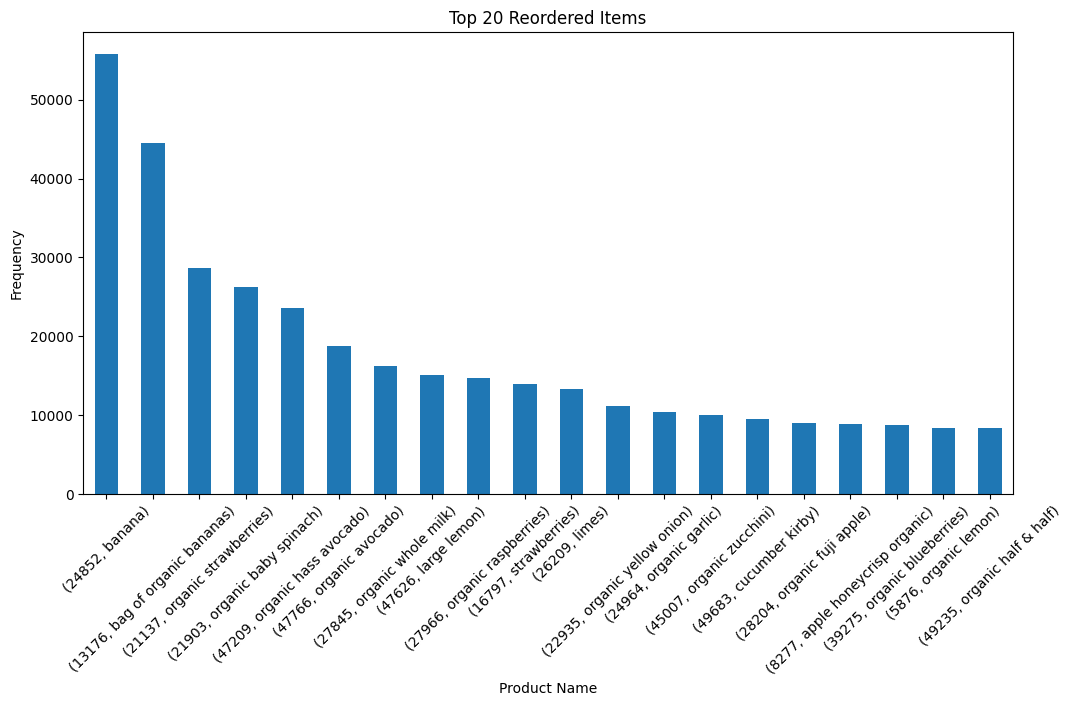

In [53]:
reorder_freq.plot(kind='bar', 
                     xlabel='Product Name', 
                     ylabel='Frequency', 
                     title='Top 20 Reordered Items',
                     figsize=(12, 6),
                     rot=45)

It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

### [C3] For each product, what proportion of its orders are reorders?

To calculate the proportion of orders for each product that are reorders:

1. **Merge the datasets**: Combine `order_products` with the `products` dataset to access product names and IDs in the same DataFrame.
2. **Group the data**: Group by `product_id` and `product_name` to isolate each product's order history.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to compute the proportion of orders for each product that were reorders. The value represents the reorder rate.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to organize the grouped data into a readable DataFrame.
6. **Optional Sorting**: Sort the results by `product_id` or another column for better clarity.

This approach provides insights into how frequently each product is reordered, helping identify customer favorites or staples.


In [54]:
detailed_orders = order_products.merge(products, on='product_id', how='inner')

In [55]:
product_grp = detailed_orders.groupby(['product_id', 'product_name'])

In [56]:
mean_reorders = product_grp['reordered'].mean().sort_values(ascending=False)
mean_reorders

product_id  product_name                              
18121       jalapenos with sea salt                       1.0
27387       banana greek nonfat yogurt                    1.0
17773       quinoa- with olive oil                        1.0
49063       rosemary & sea salt crackers                  1.0
14935       kombucha blueberry basil                      1.0
                                                         ... 
25053       frost arctic blitz sports drink               0.0
25051       herb for beef gravy mix                       0.0
25045       bandages- waterproof                          0.0
25044       pure pacific mountain strawberry preserves    0.0
24793       sea salt- course                              0.0
Name: reordered, Length: 44516, dtype: float64

In [57]:
mean_reorders_df = mean_reorders.reset_index().sort_values('product_id')
mean_reorders_df

,product_id,product_name,reordered
11957,1,chocolate sandwich cookies,0.564286
44430,2,all-seasons salt,0.000000
3746,3,robust golden unsweetened oolong tea,0.738095
14764,4,smart ones classic favorites mini rigatoni wit...,0.510204
17908,7,pure coconut water with orange,0.500000
...,...,...,...
38357,49684,vodka- triple distilled- twist of vanilla,0.000000
17853,49685,en croute roast hazelnut cranberry,0.500000
8600,49686,artisan baguette,0.625000
38360,49687,smartblend healthy metabolism dry cat food,0.000000


### [C4] For each customer, what proportion of their products ordered are reorders?

To calculate the proportion of products reordered by each customer:

1. **Merge the datasets**: Combine `order_products` with `orders` to link order and customer information.
2. **Group the data**: Group by `user_id` to focus on each customer's ordering behavior.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to determine the proportion of products reordered by each customer.
4. **Sort the results**: Use `.sort_values(ascending=False)` to identify customers with the highest reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to format the grouped data into a structured DataFrame for further analysis.

This analysis reveals the extent to which individual customers reorder products, providing insights into customer loyalty and preferences.


In [58]:
customer_reorder_stats = order_products.merge(orders, on='order_id', how='inner').groupby('user_id')['reordered'].mean()

In [59]:
sorted_reorder_stats = customer_reorder_stats.sort_values(ascending=False)
                                                          
sorted_reorder_stats_df = sorted_reorder_stats.reset_index()
sorted_reorder_stats_df

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


### [C5] What are the top 20 items that people put in their carts first?

To identify the top 20 items that people most frequently add to their carts first:

1. **Merge the datasets**: Combine `order_products` with `products` to link product names and IDs.
2. **Filter the data**: Focus on rows where `add_to_cart_order` equals 1, indicating the first item added to the cart.
3. **Group the data**: Group by `product_id` and `product_name` to aggregate the count of how often each product was the first in a cart.
4. **Count occurrences**: Use `.count()` to calculate the total number of times each product was the first added.
5. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their first-in-cart frequency.
6. **Display the top 20**: Use `.head(20)` to extract the most popular first-in-cart items.

This provides insights into which products customers prioritize in their shopping process.


In [60]:
freq_orders = order_products.merge(products, on='product_id', how='inner')
first_added = freq_orders[freq_orders['add_to_cart_order'] == 1]

In [61]:
top_20 = first_added.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20).reset_index()

In [62]:
top_20

,product_id,product_name,0
0,24852,banana,15562
1,13176,bag of organic bananas,11026
2,27845,organic whole milk,4363
3,21137,organic strawberries,3946
4,47209,organic hass avocado,3390
5,21903,organic baby spinach,3336
6,47766,organic avocado,3044
7,19660,spring water,2336
8,16797,strawberries,2308
9,27966,organic raspberries,2024


The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.

In [63]:
# Merge order_products with products on 'product_id'
merged = order_products.merge(products, on='product_id', how='left')

In [64]:
# Filter to only first added items
first_added = merged[merged['add_to_cart_order'] == 1]

In [65]:
# Group by product_id and product_name, then count
top_20_first_added = (
    first_added.groupby(['product_id', 'product_name'])
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='first_add_count')  # Rename column 
)

top_20_first_added

,product_id,product_name,first_add_count
0,24852,banana,15562
1,13176,bag of organic bananas,11026
2,27845,organic whole milk,4363
3,21137,organic strawberries,3946
4,47209,organic hass avocado,3390
5,21903,organic baby spinach,3336
6,47766,organic avocado,3044
7,19660,spring water,2336
8,16797,strawberries,2308
9,27966,organic raspberries,2024


In [66]:
# Group by product_id to find mean reorder rate
product_reorder_stats = (
    order_products.groupby('product_id')['reordered']
    .mean()
    .reset_index(name='reorder_rate')  # descriptive name
)

product_reorder_stats

,product_id,reorder_rate
0,1,0.564286
1,2,0.000000
2,3,0.738095
3,4,0.510204
4,7,0.500000
...,...,...
45568,49690,0.800000
45569,49691,0.430556
45570,49692,0.416667
45571,49693,0.440000


In [67]:
# Merge top 20 first added products with their reorder rates
top_20_comparison = top_20_first_added.merge(product_reorder_stats, on='product_id', how='left')

top_20_comparison

,product_id,product_name,first_add_count,reorder_rate
0,24852,banana,15562,0.844254
1,13176,bag of organic bananas,11026,0.834006
2,27845,organic whole milk,4363,0.829133
3,21137,organic strawberries,3946,0.773212
4,47209,organic hass avocado,3390,0.793639
5,21903,organic baby spinach,3336,0.772217
6,47766,organic avocado,3044,0.759164
7,19660,spring water,2336,0.810814
8,16797,strawberries,2308,0.696623
9,27966,organic raspberries,2024,0.768245


Comparison of top 20 first added to cart items and highest item reorder rates:

* Produce, dairy, and beverages have the highest occurence in the first-added list, indicating customers might add essential items (often perishable) to their carts first.

* High reorder rates for products like bananas, milk, and organic strawberries(over non-organic strawberries) show strong customer loyalty, suggesting these products are frequently restocked and should remain so. 

* The first-add behavior likely reflects a combination of consumer habits and app design. Popular items are likely prioritized in the app interface, which might make them more likely to be added first.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

In the conclusion of the project, you should aim to summarize the key outcomes, reflect on the objectives you achieved, and highlight the significance of your findings. Consider the following structure:

1. **Restate the Project Objectives**: Briefly mention the main goals of your project.
2. **Summarize Key Results**: Highlight the most important findings or outcomes you achieved during the project.
3. **eflect on Challenges and Learning**: Share any significant challenges you faced and how you overcame them, as well as what you learned during the process.
4. **Discuss Impact and Implications**: Explain how your project contributes to the field, solves a problem, or opens new opportunities for further research.
5. **End with a Future Outlook**: Mention potential next steps, improvements, or unanswered questions that could be explored in future work.
    
    
For example: *"In conclusion, this project successfully achieved its objectives by [briefly mention main results]. Despite challenges such as [name challenges], the experience provided valuable insights into [key learnings]. The outcomes contribute to [relevance to field or application], paving the way for future exploration into [potential next steps]."*

<div class="alert alert-info"> </b> Student Comment..</div>

Just FYI, I wasn't sure how best to format my findings and conclusions etc, so I did two versions. Let me know which one is more desirable and if it needs adjustments. 

<div class="alert alert-info"> </b> Student answer..</div>
 

__Project Objective:__

Clean and analyze datasets about the Instacart grocery delivery platform to provide key insights into customer order patterns and behavior in an effort to improve customer understanding and platform usage. 

* Datasets include: instacart_orders.csv, product.csv, order_products.csv, aisles.csv, departments.csv

1. Cleaned the data by filtering out missing values. Itentifying duplicate product names and converting all date to the lowercase before removing duplicates, to avoid losing any data. 


2. Created visualizations for the data. 


3. Provide insights and feedback into customer behavior and trends to help with business strategy and platform efficiency. 


__Key Results from data analysis:__
    
 __Order Statistics:__
 
* Most orders are placed between 9am and 5pm, with peaks at 10am and 3pm.


* Based on the dataset provided, assuming Sunday = day 0 (as this is not explicitly specified), most customers place.  


* Most customers wait 7 days between placing their first and second order, indicating customers who place weekly grocery orders. 

    - There are some outliers as some data shows 0 days, which might represent customers who place multiple orders       in a single day. The spike at 30 days is unexpected and could be a result of customers with a monthly               subscription or automatic delivery set up. The 30 day spike was not taken into account for the ultimate             finding of 7 days being the most common wait time.  
    
    
* To find the most active order hours of the day, I compared orders placed over a 24 hour period on a Wednesday versus a Saturday. This showed a small dip from the 11th to the 13th hours on Wednesday, which could be a result of people that go out for lunch during these hours, or pack lunches on work days.


* Most customers place 1-10 orders. Data shows a sharp drop off after 1 order that could benefit from further analysis. Possible reasons for this might include: 
    
    - First time order promotions
    
    - Users experimenting with the service
   
    - Possible result of customer disatisfaction with the service
   
    - Situational/Occasional, such as orders placed when someone is sick or busy


* Fresh produce are the most popular products among shoppers, particuarly fruits and vegetables.


* An average order contains 5-6 items. Most orders have between 1-20 items. 
   
   - This suggests a supplemental-style of grocery shopping rather than someone stocking up on items. Indicates customer use is driven by convenience when they need a few things at a time, for meal planning/needing specific ingredients for a recipe, and emergency, last minute purchases, or impulse buys. 
        


__Product Statistics:__


* Produce and dairy products are the most reordered items, which makes sense as they would need to be replaced most frequently. 


* High reorder rates for products like bananas, milk, and organic strawberries(over non-organic strawberries) show strong customer loyalty, suggesting these products are frequently restocked and should remain so.


* Low reorder rates on products like facial cleanser, specific seasonings and flavored vodka may indicate one-off purchases. 


* Produce, dairy and beverages like soda and water are the first items customers add to their carts.


__Challenges & Learnings:__

For me personally, I sometimes struggle with the wording of questions and overcomplicating code. For example, we cover so many topics in the coursework portion, that I sometimes will apply methods that are unnecessary or redundant. So utilizing Dot and tutor hours has been helpful for me to make sure I'm working as cleanly as possible.

Then this portion of summary was tricky for me. I obviously am doubting myself slightly in how best to format and provide feedback in a straightforward but still detailed way. 

Issues within the dataset were that the days of the week were not specified, which would make a definitive takeaway on statistics to do with days of the week. 

__Summary of Findings:__


__Pattern Analysis:__


First-Added Items Pattern:

* Focus on essentials (produce, dairy, beverages)
* Primarily perishable items
* Basic household staples


Reorder Pattern Insights:

* High loyalty to specific items
* Preference for certain varieties (organic over non-organic strawberries)
* Essential/staple items show strong repeat purchases


__Behavioral Insights:__


Shopping Psychology:

* Customers build carts around essential items
* Regular replenishment patterns for basics
* Quality preferences (organic) driving loyalty
* Lower reorder rates could indicate impulse or “one-off” purchases


__Suggestions for improvements:__


1. User Interface Optomization:
* Create "Quick Add" bundles of commonly first-added items
* Design smart shopping lists based on reorder patterns
* Highlight frequently paired items (e.g., if bananas and milk often go together)


2. Inventory Management:
* Ensure higher stock levels of high-reorder items
* Optimize delivery routes to prioritize freshness of perishables
* Implement predictive stocking for popular organic items

3. Customer Experience:
* Add "Essential Restocking" feature for high-reorder items
* Create automated reorder reminders based on typical purchase intervals
* Develop a "Fresh First" shopping flow since produce is often first-added

4. Personalization:
* Build personalized "Start Cart" suggestions based on individual reorder history
* Customize homepage displays based on first-add preferences
* Offer relevant promotions based on reorder patterns

<div class="alert alert-info"> <b>Student сomments:

Am I meant to combine all of the info above into one paragraph? I'm confused if this portion is meant to be relayed to the "client" or simply for learing purposes?

In conclusion, this project successfully achieved its objectives in cleaning and analyzing the following Instacart datasets: instacart_orders.csv, product.csv, order_products.csv, aisles.csv, departments.csv.


Despite the challenges of not having definitive knowledge as to how the days of the week were organized within the data, and several duplicated product names, we were able to identify and visualize trends within order days and times, frequency, and most popular and reordered products. By utilizing side-by-side comparisons of data sets, we were able to provide visualizations of the data. 

The outcomes contribute to the approach Instacart, or any consumer facing app, might implement to boost customer retention, lessen inventory waste, and save money. By isolating the most popular product types and most reordered products, we can establish a more streamlined inventory system. Also, by understanding their customer base, they can better prepare for times of high use versus low use, to ensure that they can meet the demand. They also can create more personalized features that will best serve the customer.  

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__

Thank you for your thoughtful and detailed submission. It’s great that you explored different ways to structure your findings and conclusions — this shows genuine effort and critical thinking.

Between the two versions, the final structured summary at the end is the most appropriate for a project conclusion. It clearly addresses the project objectives, outlines challenges, highlights key findings, and suggests real-world implications, which is exactly what’s expected.

A few suggestions to improve it even further:

    1. Consolidate some of the bullet point insights (like order stats and product stats) into concise summary statements. Too many separate points can overwhelm the reader.

    2. Polish the grammar and clarity slightly — for example, fix typos like “Optomization” (should be “Optimization”), and ensure consistent formatting (e.g., complete sentences in bullet points).

    3. Clarify the audience — while this conclusion is fine for learning purposes, you can add a sentence at the start or end indicating whether it's meant for internal analysis or hypothetical business presentation. That will help frame the tone.

To your question — no, it doesn’t all need to be one paragraph. A mix of concise sections or short paragraphs is often more readable. And yes, it’s mainly for learning purposes, but writing as though you're communicating to a client is excellent practice for real-world scenarios.

You're on the right track — just refine and simplify a bit for better flow.

Would you like help polishing the grammar and structure of your final conclusion paragraph?

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊